In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import os
os.chdir('..')
from src import utils as ut
os.chdir('notebooks')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dropout, LSTM, Dense, Embedding

In [2]:
texts = ut.load_text_data('../data/preprocessed_data.csv')

In [3]:
tokens = ut.tokenize_texts(texts)
num_words = len(ut.tokenizer.word_index) + 1
num_words

24775

In [4]:
word_idx = ut.tokenizer.word_index

In [5]:
word_idx['raven']

6044

In [6]:
word_count_df = pd.DataFrame({'words': ut.tokenizer.word_counts.keys(), 'counts': ut.tokenizer.word_counts.values()})

In [23]:
word_count_df.sort_values('counts', ascending=False, inplace=True)
total_words = word_count_df.counts.sum()
word_count_df['freq'] = word_count_df.counts/total_words
word_count_df.head

<bound method NDFrame.head of              words  counts      freq
0              the   24467  0.072733
2               of   14825  0.044070
22             and    9320  0.027706
19              to    7782  0.023134
28               a    7675  0.022815
...            ...     ...       ...
13818        notre       1  0.000003
13841  obscenities       1  0.000003
13842       clothe       1  0.000003
13844      verdure       1  0.000003
24773        treme       1  0.000003

[24774 rows x 3 columns]>

In [21]:
total_words

336395

Text(0.5, 1.0, 'Most Used Words')

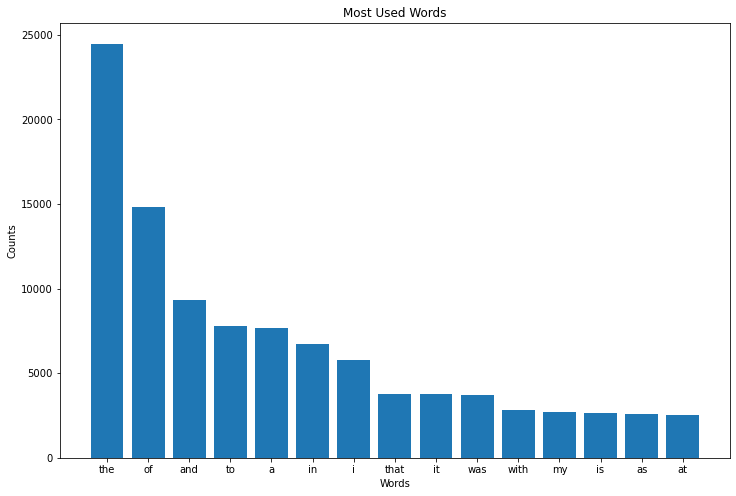

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(word_count_df.words[:15], word_count_df.counts[:15])
ax.set_xlabel('Words')
ax.set_ylabel('Counts')
ax.set_title('Most Used Words')

In [9]:
encoded_characters, char_indices = ut.encode_characters(texts)

In [18]:
[char_indices[char] for char in 'Nevermore']

[40, 59, 76, 59, 72, 67, 69, 72, 59]

In [60]:
len(char_indices)

102

In [27]:
from collections import Counter

In [48]:
total_characters = 0
C = Counter()
for t in encoded_characters:
    C.update(x for xs in texts for x in xs)
char_counts = C.most_common()
num_chars = sum([pair[1] for pair in char_counts])

In [52]:
baseline_acc = 23925230/num_chars
baseline_acc

0.17854730532728544

In [5]:
from GPTJ.Basic_api import SimpleCompletion

In [11]:
prompt = 'Once upon a midnight dreary, while I pondered, weak and weary,'
prompt2 = 'Deep into that darkness peering, long I stood there, wondering, fearing, doubting, dreaming dreams no mortal ever dared to dream before.'
temperature = 0.9
top_probability = 1.0
length = 20

In [62]:
query = SimpleCompletion(prompt, length=length, t=temperature, top = top_probability)

In [63]:
query.simple_completion()


Over many a quaint and curious volume of forgotten lore –
While I nodded, nearly napping


'\nOver many a quaint and curious volume of forgotten lore –\nWhile I nodded, nearly napping'

In [64]:
word_model_1 = ut.create_model(num_words, 20)
word_model_1.load_weights('../models/first_model.h5')
word_model_2 = ut.create_model(num_words, 20)
word_model_2.load_weights('../models/epochs_0_to_10.h5')
word_model_3 = ut.create_model(num_words, 20)
word_model_3.load_weights('../models/epochs_10_to_20.h5')
word_model_4 = ut.create_model(num_words, 20)
word_model_4.load_weights('../models/epochs_20_to_50.h5')
word_model_5 = ut.create_model(num_words, 20)
word_model_5.load_weights('../models/epochs_50_to_100.h5')
word_model_6 = ut.create_model(num_words, 20)
word_model_6.load_weights('../models/epochs_100_to_200.h5')
word_models = [word_model_1,word_model_2,word_model_3,word_model_4,word_model_5,word_model_6]

In [73]:
for model in word_models:
    ut.generate_poetry_words(prompt, 25, 1, model)

changing in a few minutes ” says the captain difficult in my neck and as i pass the barrier in time’s path formed by the
the most ghastly and loathsome most natural and most suitable forms we conceive yet borne ancient the agency of its temple have hair eight eight
the most ghastly and loathsome most natural and most suitable forms we conceive yet borne ancient the agency of its temple have hair eight eight
the most ghastly and loathsome most natural and most suitable forms we conceive yet borne ancient the agency of its temple have hair eight eight
the most ghastly and loathsome most natural and most suitable forms we conceive yet borne ancient the agency of its temple have hair eight eight
the most ghastly and loathsome most natural and most suitable forms we conceive yet borne ancient the agency of its temple have hair eight eight


In [30]:
character_model_1 = load_model('../models/character_model_10_epochs.h5')
character_model_2 = load_model('../models/character_model_20_epochs.h5')
character_model_3 = load_model('../models/character_model_30_epochs.h5')

In [31]:
models = [character_model_1, character_model_2, character_model_3]

In [63]:
for model in models:
    ut.generate_poetry_characters(prompt, 100, 1, model, char_indices)

 and the strange of the strange of the strange of the strange of the strange of the strange of the s
 and the surface of the streats of the streats of the streats of the streats of the streats of the s
 and the surface of the state of the state of the state of the state of the state of the state of th
